In [1]:
#| default_exp imagenet_tiny

In [1]:
#| export
import os
import shutil
import random
from PIL import Image
import numpy as np
import json

In [9]:
#| export
imagenet_dir = "/data/share/public/imagenet/ILSVRC2012_img_train"
imagenet_tiny_dir = "/project/validating_attribution_techniques/data/imagenet_tiny"
classes_json = "/project/validating_attribution_techniques/data/imagenet_class_index.json"

In [71]:
os.chdir(imagenet_tiny_dir)

In [201]:
#| hide
def generate_imagenet_tiny(imagenet_tiny_dir, num_samples_per_class):
    os.chdir(imagenet_tiny_dir)
    for class_dir in os.listdir(imagenet_dir):
        dir_path = os.path.join(imagenet_dir, class_dir)
        if os.path.isdir(dir_path):
            os.mkdir(class_dir)
            indices = random.sample(range(len(os.listdir(dir_path))), 5)
            class_dir_images = os.listdir(dir_path)
            for idx in indices:
                shutil.copyfile(os.path.join(dir_path, class_dir_images[idx]), os.path.join(class_dir, class_dir_images[idx]))

In [10]:
#| export
def get_imagenet_classes(classes_json_dir=classes_json):
    """
    Get the location of a json file containing the imagenet label for ImageNet1000 categories
    
    input:
      - classes_json_dir : str
    return:
      - classes : ndarray
        (class labels in string)
    """
    classes = json.load(open(classes_json_dir))
    classes = np.array(list(classes.values()))
    return classes[:, 1]

In [13]:
#| export
def get_random_images(num_images):
    """
    Get random images from the ImageNet tiny dataset created for the project.
    
    input :
      - num_images : int (Number of images to be returned)
    
    return :
      - image_list : list (List containing images, with len == num_images)
      - label_list : list (List containing the labels for each image returned, in order)
    """
    image_list = []
    label_list = []
    class_dirs = os.listdir(imagenet_tiny_dir)
    
    classes = json.load(open(classes_json))
    classes = np.array(list(classes.values()))
    
    for idx in random.sample(range(len(class_dirs)), num_images):
        class_dir = os.path.join(imagenet_tiny_dir, class_dirs[idx])
        img_files = os.listdir(class_dir)
        rand_img_idx = random.sample(range(len(img_files)), 1)[0]
        img = np.array(Image.open(os.path.join(class_dir, img_files[rand_img_idx])))
        if len(img.shape) < 3:
            img = np.expand_dims(img, -1)
        image_list.append(img)
        class_idx = np.where(classes[:, 0]==class_dirs[idx])[0][0] # idx of the dir code
        label_list.append(class_idx)
    return image_list, label_list

In [193]:
Xs, ys = get_random_images(10)

In [11]:
idx_to_class = get_imagenet_classes()

gibbon


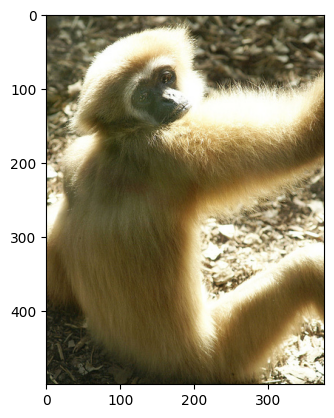

In [200]:
import matplotlib.pyplot as plt

plt.imshow(Xs[8])
print(idx_to_class[ys[8]])

In [1]:
#| hide
from nbdev.export import nb_export
nb_export('tiny_imagenet.ipynb', '../../commons/api')

In [2]:
import os
os.getcwd()

'/project/validating_attribution_techniques/abid'

In [213]:
os.chdir("/project/validating_attribution_techniques/abid")

In [12]:
idx_to_class

array(['tench', 'goldfish', 'great_white_shark', 'tiger_shark',
       'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich',
       'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting',
       'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel',
       'kite', 'bald_eagle', 'vulture', 'great_grey_owl',
       'European_fire_salamander', 'common_newt', 'eft',
       'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog',
       'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle',
       'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana',
       'American_chameleon', 'whiptail', 'agama', 'frilled_lizard',
       'alligator_lizard', 'Gila_monster', 'green_lizard',
       'African_chameleon', 'Komodo_dragon', 'African_crocodile',
       'American_alligator', 'triceratops', 'thunder_snake',
       'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake',
       'garter_snake', 'water_snake', 'vine_snake', 'night_snake',
     

In [9]:
# Gotta clean those pesky .txt log files
imagenet_tiny_root_path = os.path.join(os.getcwd(), "../data/imagenet_tiny")

for direc in os.listdir(imagenet_tiny_root_path):
    subdir_path = os.path.join(imagenet_tiny_root_path, direc)
    files = os.listdir(subdir_path)
    for file in files:
        if file.endswith('.txt'):
            os.remove(os.path.join(subdir_path, file))

4993
